<a href="https://colab.research.google.com/github/Hu-Erli/kukuku/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2 
# «Описательная статистика и построение простых графиков при помощи Pandas»

## Данные

**Датасет:​** 

Australia weather forecast data

**Описание:​** 

Этот набор данных содержит около 10 лет ежедневных наблюдений за погодой из города - Adelaide.
Датасет содержит 1148 строки и следующие столбцы:

*   Date – The date of observation.
*   ReainToday – Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.
*   MinTemp – The minimum temperature in degrees celsius.
*   MaxTemp – The maximum temperature in degrees celsius.
*   Rainfall - The amount of rainfall recorded for the day in mm.
*   Evaporation – The so-called Class A pan evaporation (mm) in the 24 hours to 9am.
*   Sunshine – The number of hours of bright sunshine in the day.
*   WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight.
*   WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight.
*   WindDir9am - Direction of the wind at 9am.

Полезная ссылочка на [документацию](https://pandas.pydata.org/pandas-docs/stable/index.html) Pandas.

Загружаем датасет.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("weather.csv")
df.head()

,Date,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am
0,2008/7/1,Yes,8.8,15.7,5.0,1.6,2.6,NW,48,SW
1,2008/7/2,No,12.7,15.8,0.8,1.4,7.8,SW,35,SSW
2,2008/7/3,No,6.2,15.1,0.0,1.8,2.1,W,20,NNE
3,2008/7/4,No,5.3,15.9,0.0,1.4,8.0,NNE,30,NNE
4,2008/7/7,Yes,7.6,11.2,16.2,4.6,1.1,WSW,46,WNW


## Описательная статистика датасета

Получим типы данных, хранящихся в датафрейме. `object` в терминологии Pandas - это строка.

In [ ]:
df.dtypes

Date              object
RainToday         object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
dtype: object

Получим размеры датафрейма. Первое значение кортежа - количество строк, второе - стобцов.

In [ ]:
df.shape

(1148, 10)

С помощью метода `size` можно дополнительно узнать общее количество ячеек в датафрейме.

In [ ]:
df.size

11480

Выясним, есть ли в датафрейме пустые значения.

In [ ]:
cols = list(df.columns)
cols.remove('Date')
cols

['RainToday',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am']

In [ ]:
df_na = {col: list(pd.isna(df[col])).count(True) for col in cols}
df_na

{'Evaporation': 0,
 'MaxTemp': 0,
 'MinTemp': 0,
 'RainToday': 0,
 'Rainfall': 0,
 'Sunshine': 0,
 'WindDir9am': 0,
 'WindGustDir': 0,
 'WindGustSpeed': 0}

Если пустые ячейки есть, то пока что можно просто удалить соответствующие строки методом [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

Для нечисловых значений посчитаем частоту встречаемости.

In [ ]:
nom_cols_data = [{name: df[col].to_list().count(name) for name in df[col].unique()}
                 for col in cols
                 if df[col].dtype == "object"]
nom_cols_data


[{'No': 889, 'Yes': 259},
 {'E': 24,
  'ENE': 29,
  'ESE': 79,
  'N': 95,
  'NE': 37,
  'NNE': 36,
  'NNW': 64,
  'NW': 76,
  'S': 16,
  'SE': 71,
  'SSE': 81,
  'SSW': 32,
  'SW': 144,
  'W': 125,
  'WNW': 77,
  'WSW': 162},
 {'E': 37,
  'ENE': 56,
  'ESE': 42,
  'N': 155,
  'NE': 161,
  'NNE': 143,
  'NNW': 53,
  'NW': 36,
  'S': 93,
  'SE': 44,
  'SSE': 40,
  'SSW': 74,
  'SW': 91,
  'W': 33,
  'WNW': 42,
  'WSW': 48}]

Так как числовые значения присутствуют только в одном на данный момент значимом стобце (возраст), посчитаем для этого столбца некоторые меры центральной тенденции и разброса:


*   минимальное значение
*   максимальное значение
*   среднее арифметическое
*   моду
*   медиану
*   дисперсию
*   стандартное отклонение
*   размах
*   интерквартильный размах
*   индекс асимметрии



In [ ]:
MinTemp_stat = {"min": df["MinTemp"].min(), 
            "max": df["MinTemp"].max(), 
            "mean": df["MinTemp"].mean(),
            "median": df["MinTemp"].median(),
            "mode": df["MinTemp"].mode().to_list(),
            "var": df["MinTemp"].var(ddof=0),
            "std": df["MinTemp"].std(ddof=0),
            "range": df["MinTemp"].max() - df["MinTemp"].min(),
            "interquartile_range": df["MinTemp"].quantile(0.75) - df["MinTemp"].quantile(0.25),
            "skew": df["MinTemp"].skew()
            }
MinTemp_stat

{'interquartile_range': 6.200000000000001,
 'max': 33.9,
 'mean': 13.155487804878035,
 'median': 12.8,
 'min': 0.7,
 'mode': [15.5],
 'range': 33.199999999999996,
 'skew': 0.5501041004130283,
 'std': 5.051535405565713,
 'var': 25.51800995368395}

Построим график распределения количества заражений по каждому возрасту.

In [ ]:
MinTemp_data = {MinTemp: df["MinTemp"].to_list().count(MinTemp) for MinTemp in set(df["MinTemp"])}
print(MinTemp_data)

{0.7: 1, 2.6: 1, 3.1: 1, 4.9: 3, 5.3: 7, 6.2: 5, 7.4: 4, 7.6: 5, 8.8: 6, 8.4: 8, 9.5: 14, 8.2: 11, 12.7: 12, 10.0: 13, 11.1: 13, 9.8: 12, 8.5: 11, 10.6: 14, 13.9: 11, 14.9: 10, 13.1: 8, 14.0: 9, 15.0: 7, 18.3: 7, 24.1: 1, 5.5: 1, 22.5: 2, 19.1: 4, 21.1: 3, 21.2: 2, 6.5: 7, 30.7: 1, 33.9: 1, 29.4: 1, 28.3: 2, 7.0: 7, 7.5: 5, 6.0: 5, 8.0: 2, 9.0: 7, 10.5: 7, 11.5: 8, 11.0: 6, 12.5: 6, 12.0: 5, 13.0: 9, 13.5: 7, 4.2: 1, 14.5: 8, 15.5: 15, 16.0: 9, 16.4: 3, 3.5: 2, 16.6: 4, 16.1: 4, 17.5: 3, 17.4: 5, 17.1: 3, 17.6: 2, 17.9: 4, 18.0: 5, 18.5: 10, 18.4: 6, 18.6: 4, 18.9: 3, 19.0: 7, 19.4: 4, 19.9: 6, 19.5: 4, 18.1: 5, 20.0: 4, 20.9: 4, 20.6: 3, 20.4: 3, 19.6: 2, 21.5: 5, 21.0: 4, 4.5: 1, 2.9: 1, 21.9: 2, 22.9: 2, 21.6: 5, 22.0: 1, 22.6: 1, 3.4: 1, 23.4: 1, 23.5: 2, 23.6: 5, 22.1: 2, 22.4: 1, 24.5: 3, 24.4: 1, 24.0: 1, 23.0: 3, 24.6: 1, 25.4: 1, 25.9: 2, 26.0: 1, 5.0: 1, 26.1: 1, 27.6: 1, 27.1: 1, 28.9: 1, 29.9: 1, 29.0: 1, 4.4: 1, 5.4: 3, 5.9: 3, 6.4: 3, 6.9: 4, 7.9: 7, 8.9: 4, 9.4: 7, 9.9: 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
MinTemp_df = pd.DataFrame.from_dict(data=MinTemp_data, orient="index", columns=["MinTemp"])
MinTemp_df.head()

,MinTemp
0.7,1
2.6,1
3.1,1
4.9,3
5.3,7


In [ ]:
from matplotlib.pyplot import MultipleLocator

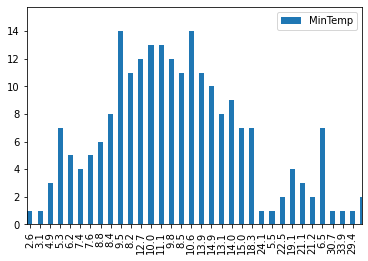

In [ ]:
MinTemp_df.plot.bar() 
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.7,33.9)
plt.show()

In [ ]:
MaxTemp_data = {MaxTemp: df["MaxTemp"].to_list().count(MaxTemp) for MaxTemp in set(df["MaxTemp"])}
print(MaxTemp_data)

{37.3: 1, 11.2: 1, 11.9: 3, 13.0: 2, 14.2: 4, 14.9: 7, 13.5: 1, 14.3: 1, 15.9: 6, 15.1: 9, 15.8: 8, 15.7: 11, 13.1: 4, 14.0: 4, 15.4: 6, 16.4: 7, 26.2: 7, 27.8: 3, 27.9: 3, 21.9: 11, 24.9: 12, 24.8: 9, 23.9: 8, 28.0: 4, 27.2: 5, 26.6: 2, 31.0: 2, 30.9: 4, 29.5: 4, 34.5: 3, 36.6: 2, 35.2: 1, 41.3: 1, 38.5: 2, 36.9: 3, 43.2: 1, 45.7: 1, 43.4: 1, 43.1: 2, 43.9: 1, 43.0: 2, 42.8: 1, 34.6: 1, 45.0: 1, 45.1: 1, 12.0: 1, 12.5: 2, 14.5: 3, 15.0: 7, 15.5: 7, 32.6: 1, 16.1: 13, 16.6: 5, 16.0: 10, 16.9: 7, 16.5: 6, 17.0: 7, 17.5: 11, 17.6: 6, 17.1: 14, 17.4: 8, 18.0: 9, 18.1: 11, 18.4: 4, 18.9: 2, 18.5: 8, 19.4: 4, 19.0: 2, 19.9: 7, 19.6: 5, 18.6: 4, 20.4: 11, 20.1: 4, 20.5: 2, 20.0: 5, 20.9: 4, 21.0: 4, 21.1: 7, 21.6: 9, 21.5: 4, 21.4: 7, 22.5: 11, 22.6: 8, 22.1: 9, 22.0: 7, 22.4: 6, 23.6: 5, 23.0: 6, 22.9: 5, 23.1: 4, 23.4: 5, 24.1: 7, 24.6: 6, 24.4: 3, 24.5: 4, 23.5: 4, 25.9: 2, 25.5: 5, 25.0: 4, 25.1: 6, 25.6: 5, 26.0: 3, 26.1: 6, 26.9: 3, 26.4: 1, 25.4: 3, 27.0: 3, 27.6: 7, 27.4: 4, 27.5: 3,

In [ ]:
MaxTemp_df = pd.DataFrame.from_dict(data=MaxTemp_data, orient="index", columns=["MaxTemp"])
MaxTemp_df.head()

,MaxTemp
37.3,1
11.2,1
11.9,3
13.0,2
14.2,4


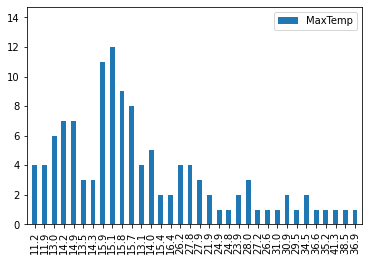

In [ ]:
MaxTemp_df.plot.bar() 
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(11.2,45.7)
plt.show()

In [ ]:
RainToday_data = {RainToday: df["RainToday"].to_list().count(RainToday) for RainToday in set(df["RainToday"])}
print(RainToday_data)

{'Yes': 259, 'No': 889}


In [ ]:
RainToday_df = pd.DataFrame.from_dict(data=RainToday_data, orient="index", columns=["RainToday"])
RainToday_df.head()

,RainToday
Yes,259
No,889


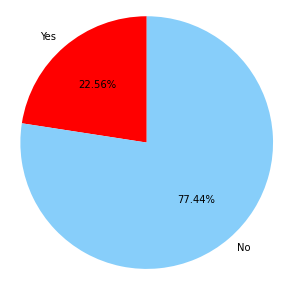

In [ ]:
plt.figure(figsize=(5,5))
labels = [u'Yes', u'No']
sizes = [259, 889]
colors = ['red', 'lightskyblue']
explode = (0,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6)
plt.axis('equal')
plt.show()

Сравним, как картинка будет выглядеть для женщин и для мужчин. Для начала найдем количество записей о женщинах и о мужчинах.

In [ ]:
Rainfall_data = {Rainfall: df["Rainfall"].to_list().count(Rainfall) for Rainfall in set(df["Rainfall"])}
print(Rainfall_data)

{0.8: 23, 0.0: 753, 1.8: 10, 3.8: 3, 4.0: 7, 5.0: 4, 1.4: 19, 6.8: 2, 3.4: 11, 9.0: 2, 8.2: 3, 11.2: 1, 2.0: 14, 1.0: 16, 6.2: 5, 10.2: 2, 16.2: 3, 17.0: 2, 10.8: 2, 18.0: 1, 16.6: 1, 21.4: 1, 22.0: 1, 14.2: 2, 24.2: 1, 3.0: 5, 17.2: 1, 24.4: 2, 28.8: 1, 28.4: 1, 29.0: 1, 6.0: 4, 30.2: 1, 34.0: 1, 7.0: 1, 37.6: 1, 38.8: 1, 8.0: 1, 10.0: 1, 12.0: 1, 13.0: 2, 15.0: 1, 20.4: 1, 2.4: 7, 0.2: 49, 4.4: 4, 5.4: 3, 6.4: 4, 7.4: 3, 8.4: 1, 10.4: 2, 11.4: 2, 12.4: 1, 13.4: 1, 2.8: 9, 15.4: 1, 4.8: 3, 5.8: 2, 7.8: 4, 0.6: 17, 0.4: 31, 8.8: 2, 9.8: 2, 9.2: 2, 1.2: 13, 2.2: 10, 15.2: 1, 3.2: 4, 4.2: 4, 5.2: 5, 7.2: 2, 4.6: 4, 5.6: 3, 6.6: 1, 1.6: 17, 8.6: 4, 2.6: 8, 3.6: 1, 11.6: 1, 12.6: 1, 15.6: 3}


In [ ]:
Rainfall_df = pd.DataFrame.from_dict(data=Rainfall_data, orient="index", columns=["Rainfall"])
Rainfall_df.head()

,Rainfall
0.8,23
0.0,753
1.8,10
3.8,3
4.0,7


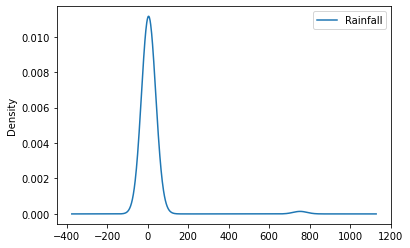

In [ ]:
Rainfall_df.plot.density()

In [ ]:
Sunshine_data = {Sunshine: df["Sunshine"].to_list().count(Sunshine) for Sunshine in set(df["Sunshine"])}
print(Sunshine_data)

{0.8: 8, 1.1: 7, 2.6: 6, 2.1: 5, 4.3: 7, 0.5: 7, 2.3: 7, 7.8: 12, 8.0: 20, 7.2: 4, 3.8: 7, 3.5: 5, 5.9: 3, 9.2: 12, 7.9: 4, 7.3: 7, 7.0: 5, 9.3: 14, 2.0: 5, 10.3: 13, 11.0: 15, 12.0: 9, 13.8: 5, 3.0: 6, 4.0: 5, 4.5: 7, 5.0: 9, 5.5: 11, 6.5: 6, 1.0: 11, 0.0: 31, 6.0: 8, 1.5: 1, 7.5: 7, 8.5: 10, 9.0: 15, 9.5: 7, 10.0: 3, 10.5: 8, 11.5: 7, 2.5: 4, 12.5: 19, 13.0: 13, 13.5: 8, 1.4: 5, 1.9: 8, 2.4: 7, 2.9: 5, 3.4: 4, 3.9: 7, 0.2: 9, 4.4: 7, 4.9: 8, 5.4: 6, 6.4: 12, 6.9: 5, 7.4: 6, 8.4: 12, 8.9: 13, 9.4: 13, 9.9: 10, 10.9: 17, 10.4: 14, 11.4: 13, 11.9: 9, 12.9: 8, 12.4: 12, 13.9: 1, 13.4: 7, 2.8: 5, 3.3: 5, 4.8: 3, 1.3: 2, 1.8: 1, 5.8: 5, 5.3: 6, 6.8: 5, 6.3: 6, 0.6: 3, 0.4: 6, 0.9: 5, 8.3: 6, 8.8: 7, 8.7: 8, 8.2: 7, 9.7: 9, 9.8: 7, 0.7: 6, 10.2: 10, 10.8: 9, 10.7: 19, 1.2: 4, 1.7: 7, 11.7: 6, 11.3: 11, 11.8: 9, 11.2: 8, 12.8: 21, 12.3: 11, 12.2: 11, 0.1: 7, 12.7: 11, 13.3: 13, 13.7: 4, 13.2: 9, 2.7: 8, 2.2: 3, 3.2: 6, 3.7: 4, 4.2: 11, 4.7: 2, 5.2: 6, 5.7: 4, 6.2: 9, 6.7: 8, 7.7: 12, 4.6: 10

In [ ]:
Sunshine_df = pd.DataFrame.from_dict(data=Sunshine_data, orient="index", columns=["Sunshine"])
Sunshine_df.head()

,Sunshine
0.8,8
1.1,7
2.6,6
2.1,5
4.3,7


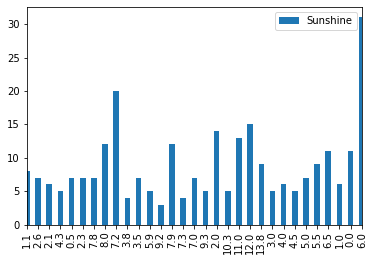

In [ ]:
Sunshine_df.plot.bar() 
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,30)
plt.show()

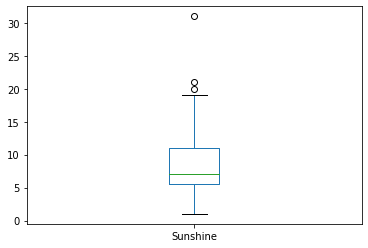

In [ ]:
Sunshine_df.plot.box()

Судя по процентному соотношению, можно сделать вывод, что женщины практически не участвовали в исследовании. Все равно построим график.

In [ ]:
WindGustDir_data = {WindGustDir: df["WindGustDir"].to_list().count(WindGustDir) for WindGustDir in set(df["WindGustDir"])}
print(WindGustDir_data)

{'NW': 76, 'SSE': 81, 'ESE': 79, 'NNW': 64, 'ENE': 29, 'WNW': 77, 'NE': 37, 'E': 24, 'WSW': 162, 'SSW': 32, 'SW': 144, 'N': 95, 'NNE': 36, 'W': 125, 'SE': 71, 'S': 16}


In [ ]:
WindGustDir_df = pd.DataFrame.from_dict(data=WindGustDir_data, orient="index", columns=["WindGustDir"])
WindGustDir_df.head()

,WindGustDir
NW,76
SSE,81
ESE,79
NNW,64
ENE,29


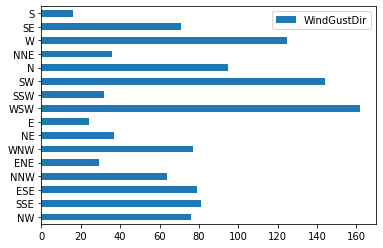

In [ ]:
WindGustDir_df.plot.barh()

In [ ]:
WindGustSpeed_data = {WindGustSpeed: df["WindGustSpeed"].to_list().count(WindGustSpeed) for WindGustSpeed in set(df["WindGustSpeed"])}
print(WindGustSpeed_data)

{13: 1, 15: 1, 17: 2, 19: 10, 20: 23, 22: 22, 24: 42, 26: 46, 28: 77, 30: 68, 31: 97, 33: 57, 35: 109, 37: 65, 39: 90, 41: 69, 43: 59, 44: 42, 46: 49, 48: 47, 50: 27, 52: 21, 54: 27, 56: 17, 57: 10, 59: 11, 61: 15, 63: 3, 65: 14, 67: 5, 69: 5, 70: 3, 74: 5, 76: 3, 78: 2, 80: 2, 81: 2}


In [ ]:
WindGustSpeed_df = pd.DataFrame.from_dict(data=WindGustSpeed_data, orient="index", columns=["WindGustSpeed"])
WindGustSpeed_df.head()

,WindGustSpeed
13,1
15,1
17,2
19,10
20,23


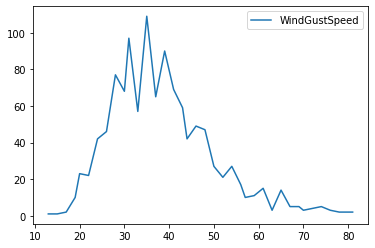

In [ ]:
WindGustSpeed_df.plot()

Посмотрим, как колеблется число респондентов в группе интерквартильного размаха - содержащей наиболее релевантные данные.

In [ ]:
WindDir9am_data = {WindDir9am: df["WindDir9am"].to_list().count(WindDir9am) for WindDir9am in set(df["WindDir9am"])}
print(WindDir9am_data)

{'NW': 36, 'ESE': 42, 'SSE': 40, 'NNW': 53, 'ENE': 56, 'WNW': 42, 'NE': 161, 'E': 37, 'WSW': 48, 'SSW': 74, 'SW': 91, 'N': 155, 'NNE': 143, 'W': 33, 'SE': 44, 'S': 93}


In [ ]:
WindDir9am_df = pd.DataFrame.from_dict(data=WindDir9am_data, orient="index", columns=["WindDir9am"])
WindDir9am_df.head()

,WindDir9am
NW,36
ESE,42
SSE,40
NNW,53
ENE,56


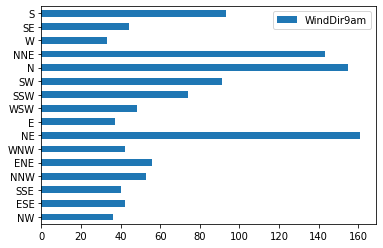

In [ ]:
WindDir9am_df.plot.barh()

Посмотрим, в какой возрастной группе больше выживших, а в какой умерших.

In [ ]:
Evaporation_data = {Evaporation: df["Evaporation"].to_list().count(Evaporation) for Evaporation in set(df["Evaporation"])}
print(Evaporation_data)

{0.8: 24, 1.6: 36, 1.8: 25, 1.4: 43, 4.6: 22, 1.2: 37, 2.8: 32, 7.0: 21, 4.0: 24, 1.0: 35, 4.4: 29, 2.0: 29, 5.8: 18, 5.0: 25, 7.6: 17, 14.4: 3, 3.0: 25, 12.0: 3, 16.4: 3, 19.0: 3, 20.0: 4, 15.2: 4, 15.4: 2, 20.8: 1, 24.6: 2, 22.6: 2, 24.8: 2, 27.2: 3, 27.6: 1, 24.0: 2, 28.8: 1, 6.0: 20, 32.2: 2, 25.4: 1, 28.0: 1, 35.0: 1, 36.0: 1, 33.6: 1, 0.0: 1, 33.8: 1, 34.0: 1, 8.0: 19, 9.0: 4, 10.0: 6, 11.0: 3, 13.0: 5, 14.0: 2, 15.0: 2, 16.0: 3, 17.0: 1, 17.4: 1, 18.4: 1, 19.6: 1, 20.6: 3, 21.4: 1, 2.4: 27, 21.6: 1, 21.0: 2, 22.4: 3, 3.4: 28, 23.4: 2, 23.6: 1, 24.4: 1, 25.6: 1, 0.2: 5, 26.4: 1, 27.4: 1, 5.4: 25, 6.4: 15, 7.4: 16, 8.4: 9, 9.4: 8, 10.4: 2, 11.4: 11, 12.4: 2, 13.4: 2, 3.8: 18, 4.8: 18, 5.3: 1, 6.8: 17, 7.8: 9, 0.6: 22, 0.4: 10, 8.2: 8, 8.8: 6, 9.8: 8, 9.2: 8, 10.2: 9, 10.8: 7, 11.8: 6, 11.2: 4, 12.8: 2, 12.2: 3, 13.2: 3, 13.8: 4, 14.2: 4, 14.8: 2, 2.2: 22, 3.2: 16, 16.2: 3, 16.8: 2, 4.2: 21, 17.2: 4, 17.8: 2, 5.2: 16, 18.8: 3, 18.2: 2, 6.2: 24, 7.2: 13, 21.2: 1, 21.8: 1, 22.2: 1, 2

In [ ]:
Evaporation_df = pd.DataFrame.from_dict(data=Evaporation_data, orient="index", columns=["Evaporation"])
Evaporation_df.head()

,Evaporation
0.8,24
1.6,36
1.8,25
1.4,43
4.6,22


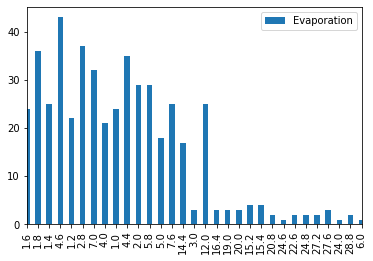

In [ ]:
Evaporation_df.plot.bar() 
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,30)
plt.show()